In [1]:
pip install numpy pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\SURAJ NATE\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


# Load the datasets

In [3]:
file1 = 'Unemployment in India.csv'
file2 = 'Unemployment_Rate_upto_11_2020.csv'

# Read the CSV files

In [4]:
data1 = pd.read_csv(file1)
data2 = pd.read_csv(file2)

# Display basic information about the datasets

In [5]:
print("\n******* Dataset 1 Info : *******\n")
print(data1.info())
print("\n******* Dataset 2 Info : *******\n")
print(data2.info())


******* Dataset 1 Info : *******

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB
None

******* Dataset 2 Info : *******

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column              

# Display the first few rows of each dataset

In [6]:
print("\n******* Dataset 1 Preview : *******\n")
print(data1.head())
print("\n\n******* Dataset 2 Preview : *******\n")
print(data2.head())


******* Dataset 1 Preview : *******

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


******* Dataset 2 Preview : *******

    

# Merge the datasets if there is a common column

In [7]:
# If no common column exists, analyze them independently
if any(col in data1.columns for col in data2.columns):
    merged_data = pd.merge(data1, data2, on=list(set(data1.columns) & set(data2.columns)), how='outer')
    print("\n******* Merged Dataset Preview : *******\n")
    print(merged_data.head())
else:
    print("\nNo common column found. Datasets will be analyzed separately.")


******* Merged Dataset Preview : *******

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   30-04-2020    Monthly                             32.30   
1  Andhra Pradesh   31-05-2020    Monthly                             24.91   
2  Andhra Pradesh   31-03-2020    Monthly                              9.88   
3  Andhra Pradesh   31-01-2020    Monthly                              7.11   
4  Andhra Pradesh   31-07-2019    Monthly                              5.64   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  \
0            2544084.0                                     26.97  Urban   
1            3428356.0                                     32.69  Urban   
2            4521537.0                                     36.08  Urban   
3            4618860.0                                     35.91  Urban   
4            4657443.0                                     36.10  Urban   

  Region.1  longitude  latitude

# Check for missing values in each dataset

In [8]:
print("\n******* Missing Values in Dataset 1 : *******\n")
print(data1.isnull().sum())
print("\n******* Missing Values in Dataset 2 : *******\n")
print(data2.isnull().sum())


******* Missing Values in Dataset 1 : *******

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

******* Missing Values in Dataset 2 : *******

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64


# Basic statistics for numerical columns

In [9]:
print("\n******* Statistics for Dataset 1 : *******\n")
print(data1.describe())
print("\n******* Statistics for Dataset 2 : *******\n")
print(data2.describe())


******* Statistics for Dataset 1 : *******

       Estimated Unemployment Rate (%)  Estimated Employed  \
count                       740.000000        7.400000e+02   
mean                         11.787946        7.204460e+06   
std                          10.721298        8.087988e+06   
min                           0.000000        4.942000e+04   
25%                           4.657500        1.190404e+06   
50%                           8.350000        4.744178e+06   
75%                          15.887500        1.127549e+07   
max                          76.740000        4.577751e+07   

       Estimated Labour Participation Rate (%)  
count                               740.000000  
mean                                 42.630122  
std                                   8.111094  
min                                  13.330000  
25%                                  38.062500  
50%                                  41.160000  
75%                                  45.505000  
max 

Step 1: Verify the column names
Check the column names in data1 to ensure that the column 'Estimated Unemployment Rate (%)' exists and is correctly named.

In [10]:
print(data1.columns)

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


Step 2: Clean column names
If there are extra spaces or special characters in the column names, you can clean them by stripping any unwanted characters.

In [11]:
data1.columns = data1.columns.str.strip()

Step 3: Use the correct column name
Once you have verified the correct column name, use it in your plot. For example, if the name is slightly different or contains unexpected characters, you should use the exact name.

# Example EDA for Dataset 1: Unemployment Rate Distribution

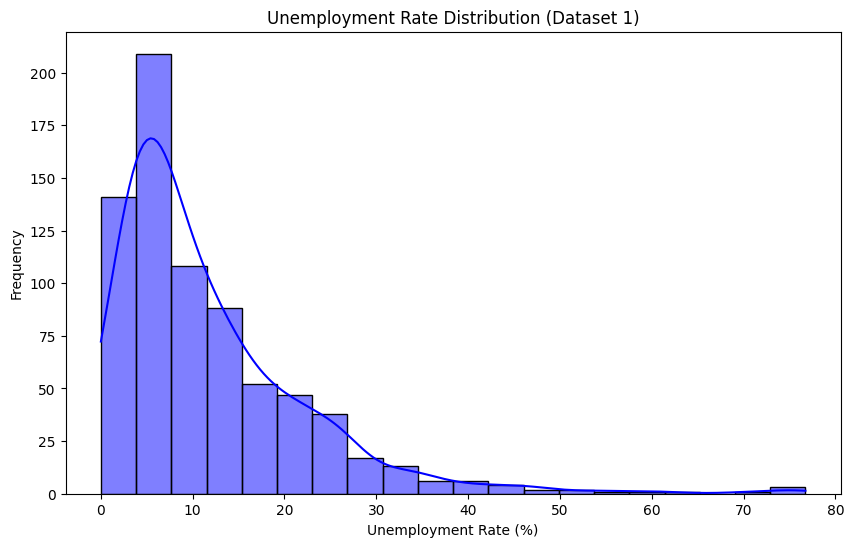

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data1['Estimated Unemployment Rate (%)'], bins=20, kde=True, color='blue')
plt.title('Unemployment Rate Distribution (Dataset 1)')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.show()

Verify Column Names: Print the column names in data2 to check if  Estimated Unemployment Rate (%) is present.

In [13]:
print(data2.columns)

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')


Clean Column Names: There may be unexpected spaces or characters. Clean up the column names by stripping any unwanted spaces or characters:

In [14]:
data2.columns = data2.columns.str.strip()

Check for Correct Column Name: After confirming the column names, ensure that Estimated Unemployment Rate (%) exists or use the exact column name that matches in your code.

# Example EDA for Dataset 2: Regional Analysis

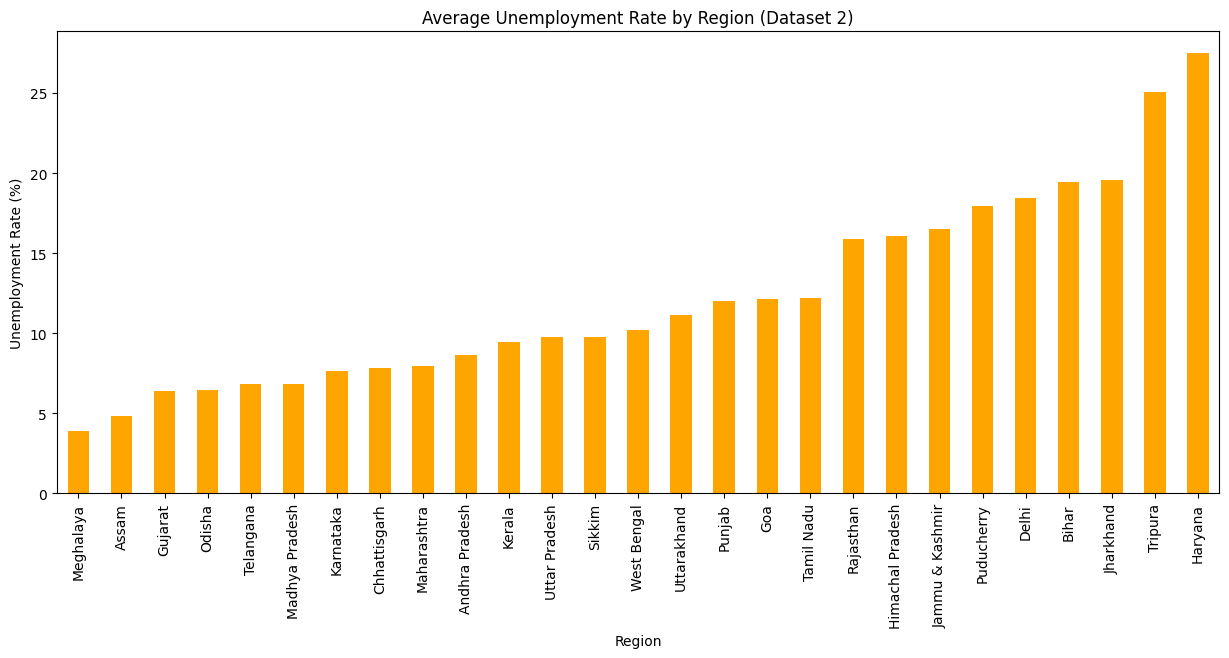

In [15]:
if 'Region' in data2.columns and 'Estimated Unemployment Rate (%)' in data2.columns:
    plt.figure(figsize=(15, 6))
    region_group = data2.groupby('Region')['Estimated Unemployment Rate (%)'].mean()
    region_group.sort_values().plot(kind='bar', color='orange')
    plt.title('Average Unemployment Rate by Region (Dataset 2)')
    plt.xlabel('Region')
    plt.ylabel('Unemployment Rate (%)')
    plt.show()

The User Interface/app Implementation Link - https://unemployment-analysis-by-surajnate.streamlit.app/